In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [ ]:
def loading_preprossing(path):
    img_list = []
    for img_path in os.listdir(path):
        img = cv2.imread(path+'/'+img_path)
        img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(255,255))
        img = img /255
        img_list.append(img)
    return img_list

In [ ]:
!pip install kagglehub  # For kagglehub
# OR
!pip install kaggle     # For the official Kaggle API


In [ ]:
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sairam76","key":"27516c8fde7288ad5eced1253df68995"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Ensure proper permissions


In [ ]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("paultimothymooney/chest-xray-pneumonia")
print("Path to dataset files:", path)


Path to dataset files: /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


In [ ]:
!ls /root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2


chest_xray


In [ ]:
train_class1 = loading_preprossing('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/NORMAL')
train_class2 = loading_preprossing('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/train/PNEUMONIA')


In [ ]:
train_labels = [0]*len(train_class1) + [1] * len(train_class2)

In [ ]:
import numpy as np

train_list = np.concatenate([train_class1, train_class2], axis=0)
# Concatenate along axis 0 (the first axis, representing the number of images)

In [ ]:
print("length of train data")
print("length of data is ",len(train_list))
print("length of labels is ",len(train_labels))

length of train data
length of data is  5216
length of labels is  5216


In [ ]:
test_class1 = loading_preprossing('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/NORMAL')
test_class2 = loading_preprossing('/root/.cache/kagglehub/datasets/paultimothymooney/chest-xray-pneumonia/versions/2/chest_xray/test/PNEUMONIA')


In [ ]:
test_labels = [0]*len(test_class1) + [1] * len(test_class2)

In [ ]:
import numpy as np # This line is probably already in your code, but it's good practice to include it

test_list = np.concatenate([test_class1, test_class2], axis=0)
# Concatenate along axis 0 (the first axis, representing the number of images)

In [ ]:
print("length of test data")
print("length of data is ",len(test_list))
print("length of labels is ",len(test_labels))

length of test data
length of data is  624
length of labels is  624


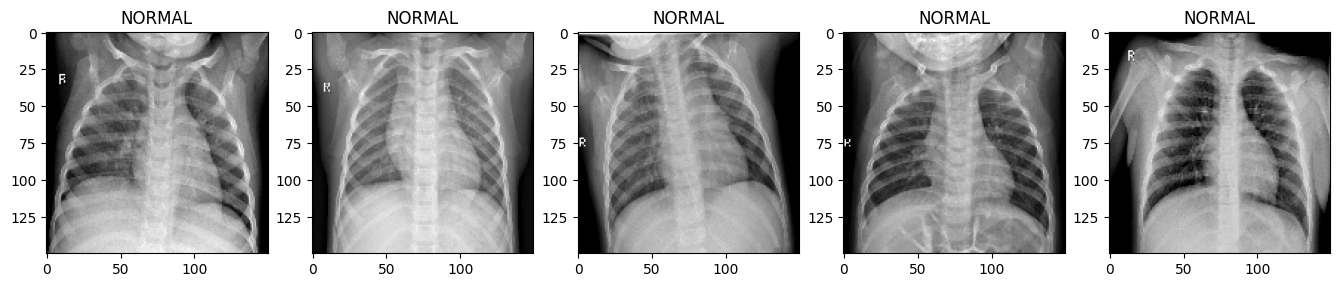

In [ ]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[:5], train_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

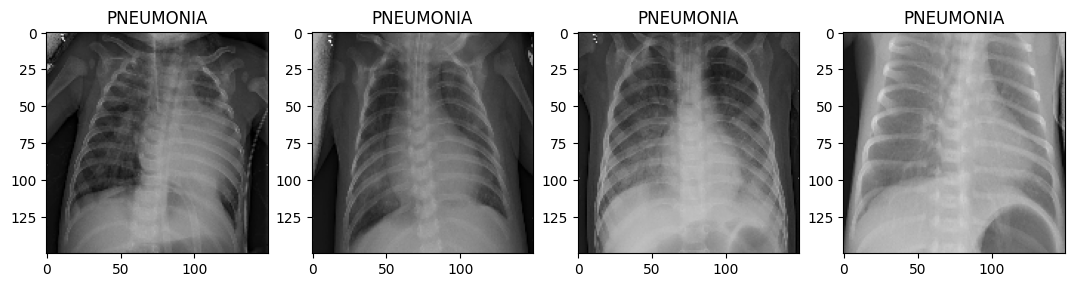

In [ ]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(train_list[-5:-1], train_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

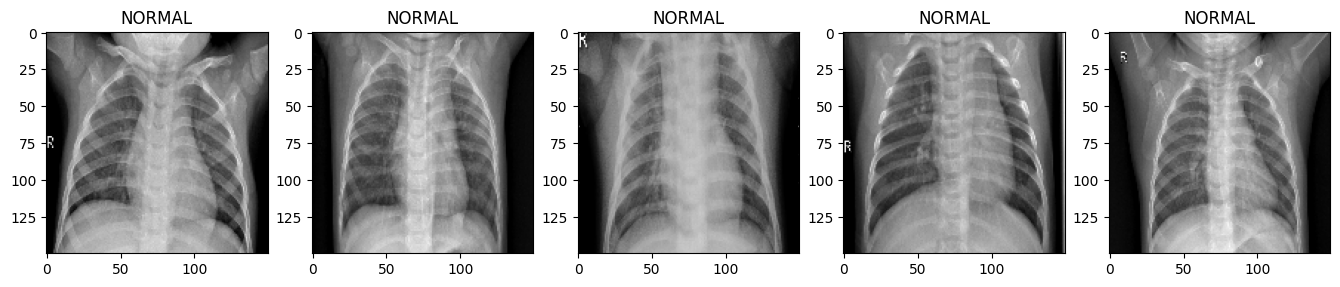

In [ ]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[:5], test_labels[:5])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

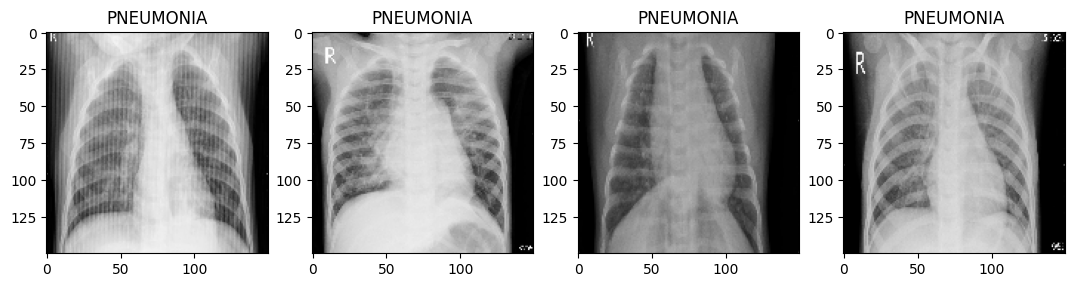

In [ ]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], test_labels[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

In [ ]:
X_train = np.array(train_list)
X_test = np.array(test_list)

In [ ]:
import tensorflow as tf
from tensorflow.keras import models , layers ,utils

In [ ]:
y_train = utils.to_categorical(train_labels,num_classes = 2)
y_test = utils.to_categorical(test_labels,num_classes = 2)

In [ ]:
y_train.shape

(5216, 2)

In [ ]:
y_test.shape

(624, 2)

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu',input_shape=(X_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(16,kernel_size = (3,3),padding = 'same',strides=1,activation = 'relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 75, 75, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 21904)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       1,401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │           1,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,408,514 (5.37 MB)

 Trainable params: 1,408,514 (5.37 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 133s 815ms/step - accuracy: 0.9580 - loss: 0.1171 - val_accuracy: 0.7019 - val_loss: 1.9232
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 820ms/step - accuracy: 0.9722 - loss: 0.0707 - val_accuracy: 0.7356 - val_loss: 2.3347
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 135s 828ms/step - accuracy: 0.9821 - loss: 0.0585 - val_accuracy: 0.7131 - val_loss: 2.5649
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 149s 871ms/step - accuracy: 0.9864 - loss: 0.0398 - val_accuracy: 0.7244 - val_loss: 3.0701
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 195s 826ms/step - accuracy: 0.9907 - loss: 0.0290 - val_accuracy: 0.7324 - val_loss: 3.2859


In [ ]:
y_pred = model.predict(X_test)
y_pred = np.argmax(np.round(y_pred),axis=1)
y_pred

20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step


array([1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns

In [ ]:
accuracy = accuracy_score(test_labels, y_pred)
precision = precision_score(test_labels, y_pred)
recall = recall_score(test_labels, y_pred)
f1 = f1_score(test_labels, y_pred)

In [ ]:
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.73


In [ ]:
print(f'Precision: {precision:.2f}')

Precision: 0.70


In [ ]:
print(f'Recall: {recall:.2f}')

Recall: 0.99


In [ ]:
print(f'F1 Score: {f1:.2f}')

F1 Score: 0.82


In [ ]:
cm = confusion_matrix(test_labels, y_pred)

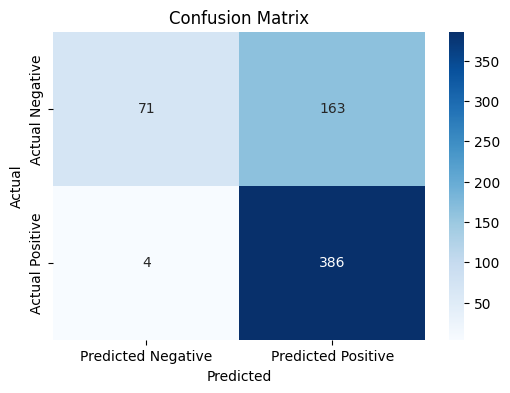

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

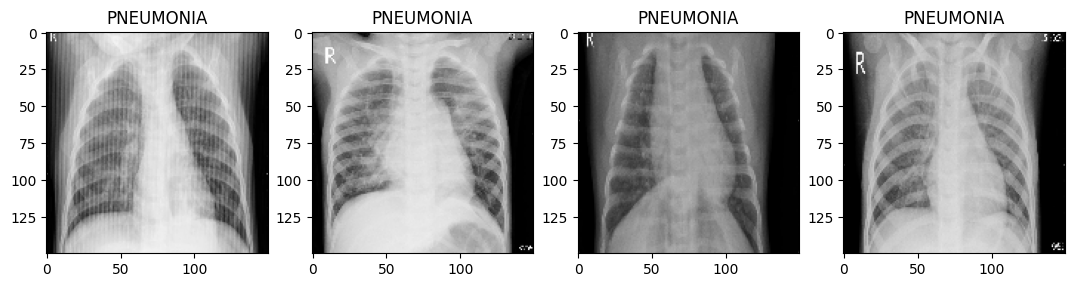

In [ ]:
plt.figure(figsize = (20,20))
for i , (img,label) in enumerate(zip(test_list[-5:-1], y_pred[-5:-1])):
    plt.subplot(5,6,i+1)
    plt.imshow(img)
    if label == 0:
        title ="NORMAL"
    elif label == 1:
        title ="PNEUMONIA"
    plt.title(title)

In [ ]:
model.save('CNN_model.h5')